# Data Owner

In [1]:
from src.AriesDuetTokenExchanger import AriesDuetTokenExchanger

%autoawait
import time
import asyncio
import os
import nest_asyncio
from aries_cloudcontroller import AriesAgentController

IPython autoawait is `on`, and set to use `asyncio`


## Instantiate the Aries Controller

Note the current arguments assume you are running the docker-compose environment locally. You will need to change this if you are running it on a VM.

In [2]:
api_key = os.getenv("ACAPY_ADMIN_API_KEY")
admin_url = os.getenv("ADMIN_URL")
webhook_port = os.getenv("WEBHOOK_PORT")
webhook_host = "0.0.0.0"

print(
    f"Initialising a controller with admin api at {admin_url} and an api key of {api_key}"
)
dataowner_controller = AriesAgentController(admin_url, api_key)

dataowner_controller.init_webhook_server(webhook_host, webhook_port)

Initialising a controller with admin api at http://data-owner-agent:4021 and an api key of dataownerssecretapikey


In [3]:
dataowner_exchanger = AriesDuetTokenExchanger(agent_controller=dataowner_controller)

REGISTER LISTENERS
Subscribing too: basicmessages
Subscribing too: issue_credential
Subscribing too: connections
Subscribing too: present_proof


## Get Data Owner Credential from Open Mined Authority

You will need to navigate to the **OM Authority application**, authenticate by creating a connection using the mobile wallet that contains the OM PKI credential from the previous notebooks and the create a Data Owner invitation and copy this across.

Alternatively, if this full stack application is not running the invitation can be generated by running through the OM Authority notebooks (at port 8890)

In [4]:
invite = {'@type': 'did:sov:BzCbsNYhMrjHiqZDTUASHg;spec/connections/1.0/invitation', '@id': '137d4c31-da07-4ac2-82d4-cf09c8688dc0', 'label': 'OpenMined Duet Authority', 'serviceEndpoint': 'http://2fe368165f23.ngrok.io', 'recipientKeys': ['EcvqLn1BoKd2PauT4c3KTMVKwbiCmZh2fsoGS6zwatmb']}

In [5]:
dataowner_exchanger.receive_invitation(invite)

----------------------------------------------------------
Connection Webhook Event Received
Connection ID :  8ed066c4-763e-4f29-b30f-172663d4a445
State :  invitation
Routing State :  none
Their Role :  inviter
----------------------------------------------------------
----------------------------------------------------------
Connection Webhook Event Received
Connection ID :  8ed066c4-763e-4f29-b30f-172663d4a445
State :  request
Routing State :  none
Their Role :  inviter
----------------------------------------------------------
Connection {'routing_state': 'none', 'state': 'request', 'created_at': '2021-04-29 12:57:51.558653Z', 'accept': 'auto', 'updated_at': '2021-04-29 12:57:51.586047Z', 'invitation_mode': 'once', 'their_role': 'inviter', 'my_did': '3gnxahciDZaj65Pgx1KwZm', 'rfc23_state': 'request-sent', 'invitation_key': 'EcvqLn1BoKd2PauT4c3KTMVKwbiCmZh2fsoGS6zwatmb', 'their_label': 'OpenMined Duet Authority', 'connection_id': '8ed066c4-763e-4f29-b30f-172663d4a445', 'request_id':

'8ed066c4-763e-4f29-b30f-172663d4a445'

## Configure Duet Server Challenge

This is a proof request that is made to every entity who attempts to make a connection with the Duet server. Before receiving the relevant token they must respond with a valid presentation to this request.

Note this challenge could be anything you want, designed to establish context specific trust dependant on the use case. For the challenge to be useful you must be confident that the correct entities will be able to get access to the credential needed to respond. 

The Data Owner is going to challenge all connections to present the scope attribute issued as part of the following schema `Sgg1wREgfEwbEPCQn9xEuE:2:OM Data Scientist:0.0.1`. 

Note: An extension might include how to use the value of the scope attribute presented to define permissions.

In [6]:
schema_id = "Sgg1wREgfEwbEPCQn9xEuE:2:OM Data Scientist:0.0.1"


revocation = False
exchange_tracing = False

# Enable this to ask for attributes to identity a user
# TODO - change restriction to schemaId or credentialId

req_attrs = [
    {"name": "scope", "restrictions": [{"schema_id": schema_id}]},
]

global indy_proof_request
indy_proof_request = {
    "name": "Proof of Scientist",
    "version": "1.0",
    "requested_attributes": {
        f"0_{req_attr['name']}_uuid": req_attr for req_attr in req_attrs
    },
    "requested_predicates": {
        #         f"0_{req_pred['name']}_GE_uuid":
        #         req_pred for req_pred in req_preds
    },
}

In [7]:
dataowner_exchanger.configure_challenge(indy_proof_request)

## Launch Duet Session

Notice how we are passing in an optional token_exchanger. This must be a DuetTokenExchanger, that implements a mechanisms to send and recieve a Duet token identifier with the other PPML participant. In this case the Data Scientist.

As we are using the AriesExchanger class, this is done across a DIDComm connection that first must be established. So rather than printing the Duet token and asking you to manually copy this across, we print out an aries invitation. 

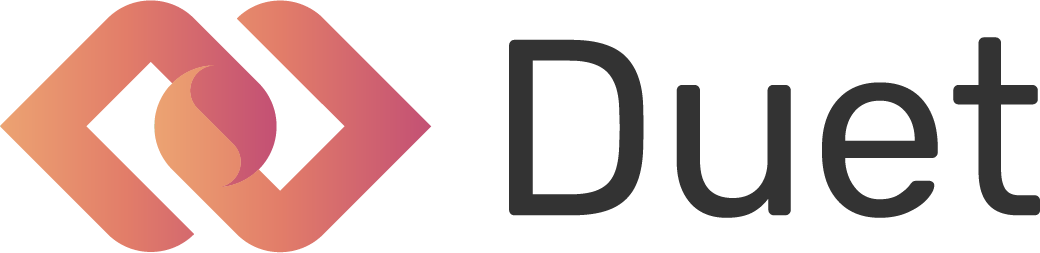

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the aries invitation to your Duet Partner!

{"@type": "did:sov:BzCbsNYhMrjHiqZDTUASHg;spec/connections/1.0/invitation", "@id": "59de814e-35f1-460d-8f17-3e90dc94fed1", "serviceEndpoint": "http://48da457f8b63.ngrok.io", "label": "Data Owner", "recipientKeys": ["4DF4urWSYJQ2HS7pDgEHdbViWv8rJWhf8gvenzhQrgam"]}

Waiting for active connection 498ac2fc-d4d4-40fc-8b8f-a43a3f50bf15
----------------------------------------------------------
Connection Webhook Event Received
Connection ID :  498ac2fc-d4d4-40fc-8b8f-a43a3f50bf15
State :  invit

In [ ]:
import syft as sy

duet = sy.launch_duet(credential_exchanger=dataowner_exchanger)

In [ ]:
duet